# Project 1 # 

## Which NBA Players combined peak dominance with career longevity, and how do their performances compare across different eras of the league? ##

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Reading in the Data ##

In [5]:
player_stats = pd.read_csv("PlayerStatistics.csv", low_memory=False)

In [6]:
player_stats.columns

Index(['firstName', 'lastName', 'personId', 'gameId', 'gameDate',
       'playerteamCity', 'playerteamName', 'opponentteamCity',
       'opponentteamName', 'gameType', 'gameLabel', 'gameSubLabel',
       'seriesGameNumber', 'win', 'home', 'numMinutes', 'points', 'assists',
       'blocks', 'steals', 'fieldGoalsAttempted', 'fieldGoalsMade',
       'fieldGoalsPercentage', 'threePointersAttempted', 'threePointersMade',
       'threePointersPercentage', 'freeThrowsAttempted', 'freeThrowsMade',
       'freeThrowsPercentage', 'reboundsDefensive', 'reboundsOffensive',
       'reboundsTotal', 'foulsPersonal', 'turnovers', 'plusMinusPoints'],
      dtype='object')

In [7]:
player_stats.dtypes

firstName                   object
lastName                    object
personId                     int64
gameId                       int64
gameDate                    object
playerteamCity              object
playerteamName              object
opponentteamCity            object
opponentteamName            object
gameType                    object
gameLabel                   object
gameSubLabel                object
seriesGameNumber           float64
win                          int64
home                         int64
numMinutes                 float64
points                     float64
assists                    float64
blocks                     float64
steals                     float64
fieldGoalsAttempted        float64
fieldGoalsMade             float64
fieldGoalsPercentage       float64
threePointersAttempted     float64
threePointersMade          float64
threePointersPercentage    float64
freeThrowsAttempted        float64
freeThrowsMade             float64
freeThrowsPercentage

## Viewing the Data ##

In [9]:
player_stats

,firstName,lastName,personId,gameId,gameDate,playerteamCity,playerteamName,opponentteamCity,opponentteamName,gameType,...,threePointersPercentage,freeThrowsAttempted,freeThrowsMade,freeThrowsPercentage,reboundsDefensive,reboundsOffensive,reboundsTotal,foulsPersonal,turnovers,plusMinusPoints
0,James,Johnson,201949,42400407,2025-06-22 20:00:00,Indiana,Pacers,Oklahoma City,Thunder,Playoffs,...,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,T.J.,McConnell,204456,42400407,2025-06-22 20:00:00,Indiana,Pacers,Oklahoma City,Thunder,Playoffs,...,0.000,0.0,0.0,0.000,6.0,0.0,6.0,2.0,7.0,-12.0
2,Myles,Turner,1626167,42400407,2025-06-22 20:00:00,Indiana,Pacers,Oklahoma City,Thunder,Playoffs,...,0.333,4.0,1.0,0.250,3.0,1.0,4.0,3.0,1.0,-12.0
3,Pascal,Siakam,1627783,42400407,2025-06-22 20:00:00,Indiana,Pacers,Oklahoma City,Thunder,Playoffs,...,0.400,7.0,4.0,0.571,3.0,1.0,4.0,2.0,1.0,-4.0
4,Alex,Caruso,1627936,42400407,2025-06-22 20:00:00,Oklahoma City,Thunder,Indiana,Pacers,Playoffs,...,0.400,0.0,0.0,0.000,1.0,2.0,3.0,3.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627433,Fred,Sheffield,78131,24600052,1946-11-26 19:00:00,Philadelphia,Warriors,Boston,Celtics,Regular Season,...,0.000,0.0,1.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1627434,Connie,Simmons,78153,24600052,1946-11-26 19:00:00,Boston,Celtics,Philadelphia,Warriors,Regular Season,...,0.000,0.0,5.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1627435,Johnny,Simmons,78154,24600052,1946-11-26 19:00:00,Boston,Celtics,Philadelphia,Warriors,Regular Season,...,0.000,0.0,2.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1627436,Virgil,Vaughn,78411,24600052,1946-11-26 19:00:00,Boston,Celtics,Philadelphia,Warriors,Regular Season,...,0.000,0.0,2.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0


## Cleaning the Dataset ##

In [11]:
# Select relevant columns for project analysis
player_stats = player_stats[["firstName", "lastName", "playerteamName", "gameDate", "gameType", 
"gameLabel", "gameSubLabel", "numMinutes", "points", "assists", "blocks", "steals", 
"fieldGoalsMade", "fieldGoalsAttempted", "fieldGoalsPercentage", "threePointersMade", 
"threePointersAttempted", "threePointersPercentage", "freeThrowsMade", "freeThrowsAttempted", 
"freeThrowsPercentage", "reboundsTotal", "turnovers", ]]

In [12]:
# --- Create Season Column ---
player_stats["gameDate"] = pd.to_datetime(player_stats["gameDate"])
player_stats["year"] = player_stats["gameDate"].dt.year
player_stats["month"] = player_stats["gameDate"].dt.month

def get_season(row):
    if row["month"] >= 10:  # Oct–Dec → season starts that year
        return f"{row['year']}-{str(row['year']+1)[-2:]}"
    else:  # Jan–Jun → season started previous year
        return f"{row['year']-1}-{str(row['year'])[-2:]}"
        
if "season" not in player_stats.columns:
    player_stats["season"] = player_stats.apply(get_season, axis=1)

player_stats["season"] = player_stats.apply(get_season, axis=1)

# --- 1) Build player-season REGULAR SEASON totals ---
regular = player_stats[player_stats["gameType"] == "Regular Season"].copy()

player_season = (
    regular.groupby(["firstName", "lastName", "playerteamName", "season"], as_index=False)
    .agg(
        gamesPlayed=("gameDate", "nunique"),   # safer than 'count' in case of duplicates
        totalPoints=("points", "sum"),
        totalAssists=("assists", "sum"),
        totalRebounds=("reboundsTotal", "sum"),
        totalMinutes=("numMinutes", "sum"),
    )
)

player_season["ppg"] = player_season["totalPoints"] / player_season["gamesPlayed"]
player_season["apg"] = player_season["totalAssists"] / player_season["gamesPlayed"]
player_season["rpg"] = player_season["totalRebounds"] / player_season["gamesPlayed"]
player_season["mpg"] = player_season["totalMinutes"] / player_season["gamesPlayed"]

/var/folders/md/_scc2rxd2q177sjc1pgjfyt00000gn/T/ipykernel_59841/55251529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_stats["gameDate"] = pd.to_datetime(player_stats["gameDate"])
/var/folders/md/_scc2rxd2q177sjc1pgjfyt00000gn/T/ipykernel_59841/55251529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_stats["year"] = player_stats["gameDate"].dt.year
/var/folders/md/_scc2rxd2q177sjc1pgjfyt00000gn/T/ipykernel_59841/55251529.py:4: SettingWithCopyWarning: 
A value is trying to be set on 

## Exploratory Data Analysis ##

In [14]:
player_season.isna().sum()
player_season.describe()

,gamesPlayed,totalPoints,totalAssists,totalRebounds,totalMinutes,ppg,apg,rpg,mpg
count,27843.000000,27843.000000,27843.000000,27843.000000,27843.000000,27843.000000,27843.000000,27843.000000,27843.000000
mean,52.809000,491.264088,104.776676,201.111374,1043.520709,7.850505,1.678026,3.220283,16.874062
std,26.838935,493.817568,132.983872,216.594646,911.687733,6.301506,1.796818,2.792518,11.157579
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,88.000000,13.000000,37.000000,206.000000,2.842105,0.413188,1.181818,6.986993
50%,61.000000,337.000000,56.000000,136.000000,820.000000,6.338710,1.088608,2.548780,15.958333
75%,78.000000,757.000000,144.000000,289.000000,1747.000000,11.480260,2.318182,4.456656,26.133333
max,82.000000,4029.000000,1164.000000,2073.000000,3882.000000,50.362500,14.538462,26.819444,48.525000


In [15]:
season_counts = player_season.groupby(["firstName","lastName"]).season.nunique().sort_values(ascending=False) 
player_season.sort_values("ppg", ascending=False).head(10)

,firstName,lastName,playerteamName,season,gamesPlayed,totalPoints,totalAssists,totalRebounds,totalMinutes,ppg,apg,rpg,mpg
27553,Wilt,Chamberlain,Warriors,1961-62,80,4029.0,192.0,2052.0,3882.0,50.362500,2.400000,25.650000,48.525000
27554,Wilt,Chamberlain,Warriors,1962-63,80,3586.0,264.0,1946.0,3806.0,44.825000,3.300000,24.325000,47.575000
27556,Wilt,Chamberlain,Warriors,1964-65,38,1480.0,117.0,893.0,1743.0,38.947368,3.078947,23.500000,45.868421
27552,Wilt,Chamberlain,Warriors,1960-61,79,3033.0,140.0,2073.0,3774.0,38.392405,1.772152,26.240506,47.772152
8641,Elgin,Baylor,Lakers,1961-62,48,1836.0,107.0,862.0,481.0,38.250000,2.229167,17.958333,10.020833
27551,Wilt,Chamberlain,Warriors,1959-60,72,2707.0,163.0,1931.0,3338.0,37.597222,2.263889,26.819444,46.361111
19051,Michael,Jordan,Bulls,1986-87,82,3041.0,377.0,430.0,3281.0,37.085366,4.597561,5.243902,40.012195
27555,Wilt,Chamberlain,Warriors,1963-64,80,2948.0,403.0,1790.0,3689.0,36.850000,5.037500,22.375000,46.112500
12007,James,Harden,Rockets,2018-19,78,2818.0,586.0,518.0,2827.0,36.128205,7.512821,6.641026,36.243590
22295,Rick,Barry,Warriors,1966-67,78,2775.0,282.0,714.0,3175.0,35.576923,3.615385,9.153846,40.705128


In [27]:
# League average PPG (games-weighted) per season — no apply, no warning
league_scoring = (
    player_season
      .groupby("season", as_index=False)[["totalPoints", "gamesPlayed"]]
      .sum()
      .assign(leaguePPG_weighted=lambda d: d["totalPoints"] / d["gamesPlayed"])
      [["season", "leaguePPG_weighted"]]
)

# sort seasons by numeric start year for plotting
league_scoring["start_year"] = league_scoring["season"].str.slice(0, 4).astype(int)
league_scoring = league_scoring.sort_values("start_year")

## Using Matplotlib for EDA Visualization ##

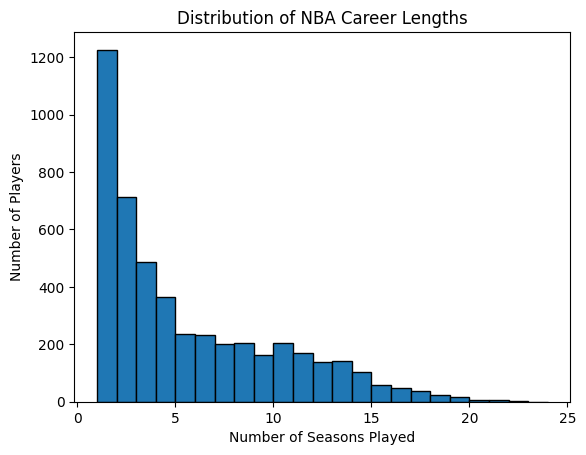

In [30]:
career_lengths = player_season.groupby(["firstName", "lastName"]).season.nunique()

plt.hist(career_lengths, bins=range(1, 25), edgecolor="black")
plt.xlabel("Number of Seasons Played")
plt.ylabel("Number of Players")
plt.title("Distribution of NBA Career Lengths")
plt.show()

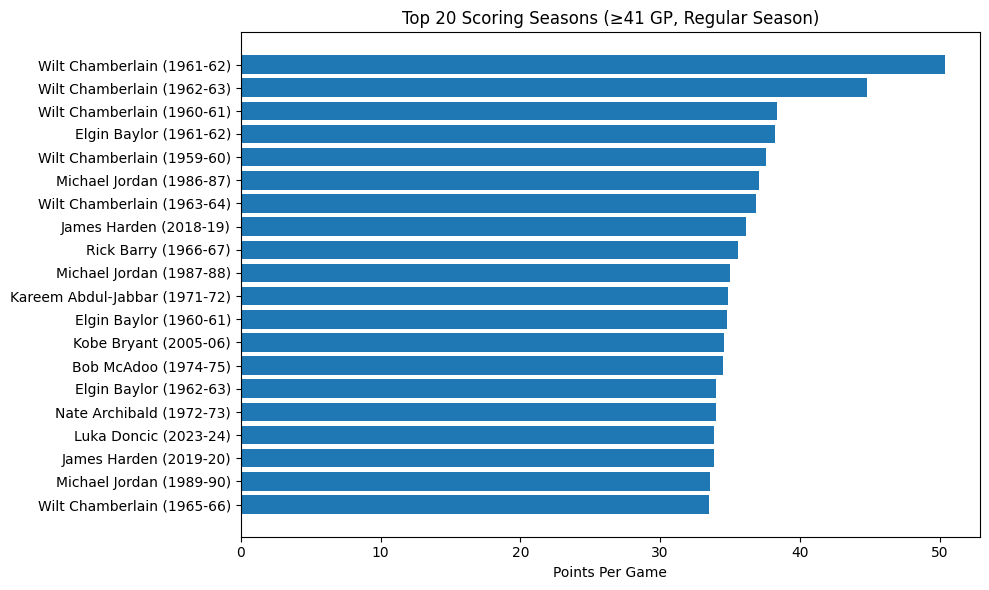

In [32]:
# --- 4) Top scoring seasons with minimum games threshold ---
MIN_GAMES = 41  # half a season; adjust to 50 if you want stricter

top_scorer_pool = player_season[player_season["gamesPlayed"] >= MIN_GAMES].copy()
top_scorers = top_scorer_pool.sort_values("ppg", ascending=False).head(20)

plt.figure(figsize=(10, 6))
labels = (
    top_scorers["firstName"] + " " + top_scorers["lastName"] +
    " (" + top_scorers["season"] + ")"
)
plt.barh(labels, top_scorers["ppg"])
plt.xlabel("Points Per Game")
plt.title(f"Top 20 Scoring Seasons (≥{MIN_GAMES} GP, Regular Season)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

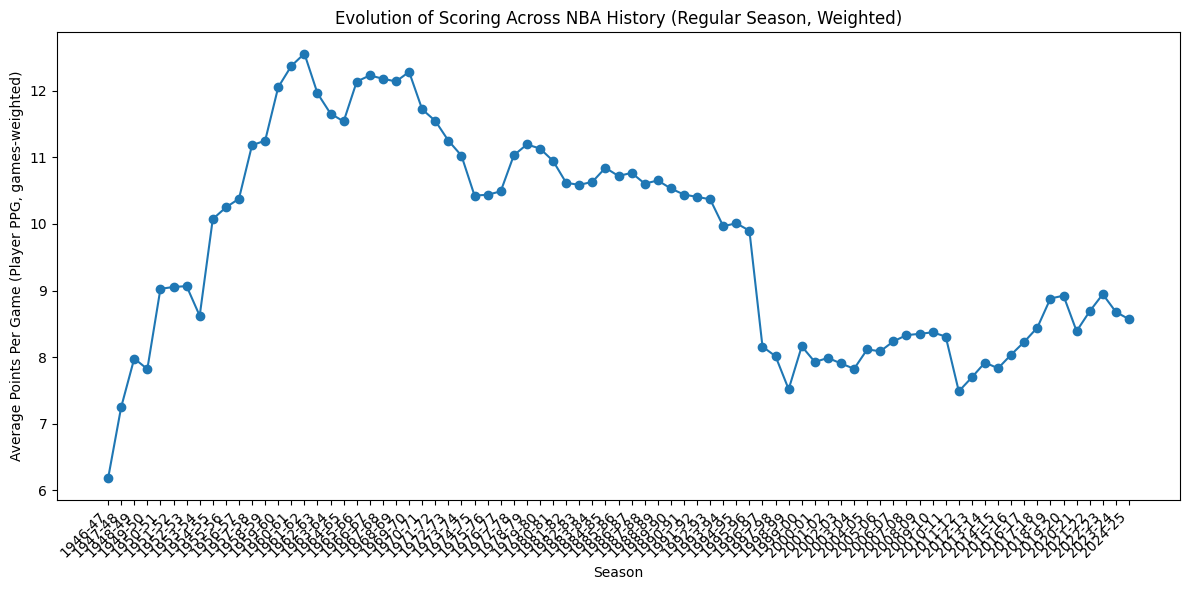

In [34]:
# --- 3) Plot the corrected league scoring trend ---
plt.figure(figsize=(12, 6))
plt.plot(league_scoring["season"], league_scoring["leaguePPG_weighted"], marker="o")
plt.xlabel("Season")
plt.ylabel("Average Points Per Game (Player PPG, games-weighted)")
plt.title("Evolution of Scoring Across NBA History (Regular Season, Weighted)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

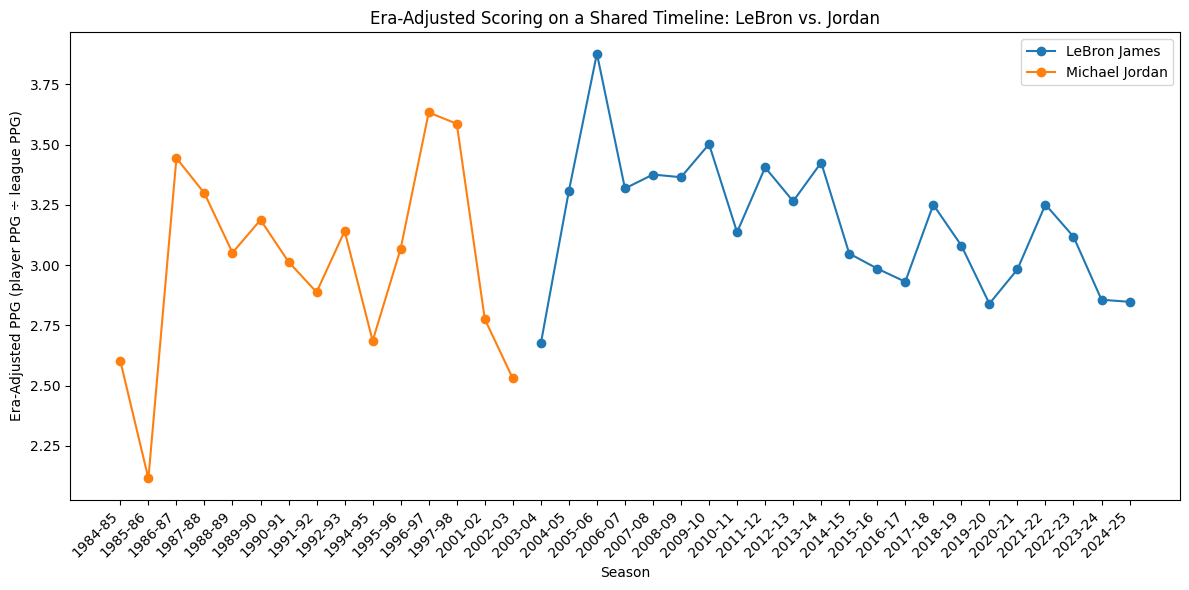

In [36]:
# --- Era-adjusted PPG (keep these lines) ---
era_df = player_season.merge(league_scoring[["season", "leaguePPG_weighted"]], on="season", how="left")
era_df["eraAdjustedPPG"] = era_df["ppg"] / era_df["leaguePPG_weighted"]

# --- Select players of interest ---
players_of_interest = era_df[
    ((era_df["firstName"] == "LeBron") & (era_df["lastName"] == "James")) |
    ((era_df["firstName"] == "Michael") & (era_df["lastName"] == "Jordan"))
].copy()
players_of_interest["player"] = players_of_interest["firstName"] + " " + players_of_interest["lastName"]
players_of_interest["start_year"] = players_of_interest["season"].str.slice(0, 4).astype(int)

# --- One unified, chronological season axis ---
season_order = (
    players_of_interest[["season", "start_year"]]
    .drop_duplicates()
    .sort_values("start_year")["season"]
    .tolist()
)

# --- Pivot wide and plot both lines on the same x-axis ---
plot_df = (
    players_of_interest
    .pivot(index="season", columns="player", values="eraAdjustedPPG")
    .reindex(season_order)
)

plt.figure(figsize=(12, 6))
for col in plot_df.columns:
    plt.plot(plot_df.index, plot_df[col], marker="o", label=col)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Season")
plt.ylabel("Era-Adjusted PPG (player PPG ÷ league PPG)")
plt.title("Era-Adjusted Scoring on a Shared Timeline: LeBron vs. Jordan")
plt.legend()
plt.tight_layout()
plt.show()

## Looking at Peak Dominance ##

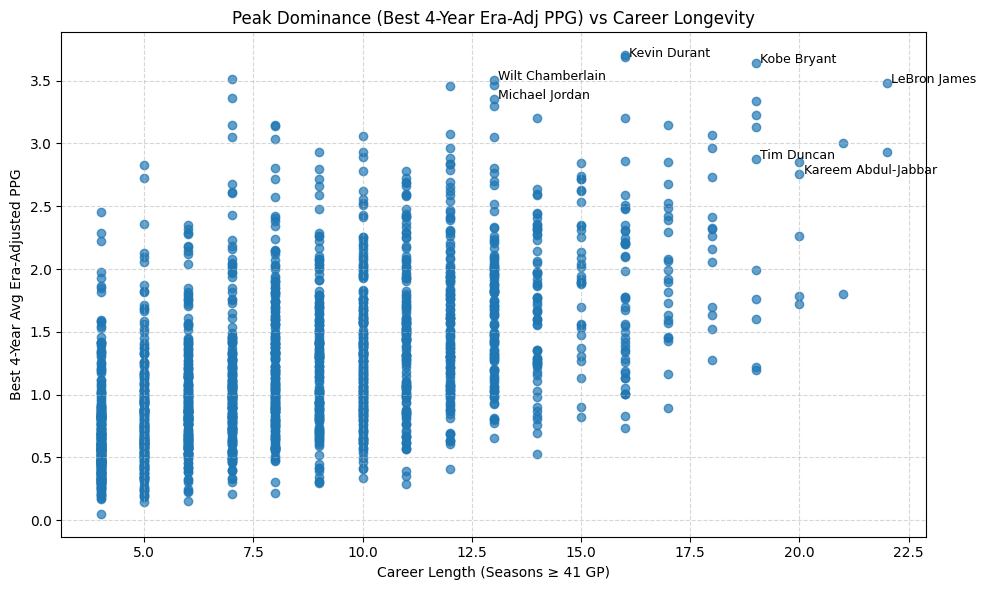

In [39]:
MIN_GAMES = 41

# 1) Collapse across teams within a season (player-season totals)
#    If your existing player_season is per team, combine to player+season.
ps_all = (
    player_season
    .groupby(["firstName", "lastName", "season"], as_index=False)
    .agg(
        gamesPlayed=("gamesPlayed", "sum"),
        totalPoints=("totalPoints", "sum"),
        totalAssists=("totalAssists", "sum"),
        totalRebounds=("totalRebounds", "sum"),
        totalMinutes=("totalMinutes", "sum"),
    )
)
ps_all["ppg"] = ps_all["totalPoints"] / ps_all["gamesPlayed"]

# 2) Era-adjusted PPG: merge weighted league average, compute ratio
era_df = ps_all.merge(
    league_scoring[["season", "leaguePPG_weighted"]],
    on="season",
    how="left"
)
era_df["eraAdjustedPPG"] = era_df["ppg"] / era_df["leaguePPG_weighted"]

# 3) Add start_year and sort for rolling windows
era_df["start_year"] = era_df["season"].str.slice(0, 4).astype(int)
era_df = era_df.sort_values(["firstName", "lastName", "start_year"])

# 4) Peak dominance: best 4-year rolling average of era-adjusted PPG
#    (Only count seasons with enough games in the rolling window)
era_elig = era_df[era_df["gamesPlayed"] >= MIN_GAMES].copy()
era_elig["eraAdj4yr"] = (
    era_elig
    .groupby(["firstName", "lastName"])["eraAdjustedPPG"]
    .transform(lambda s: s.rolling(window=4, min_periods=4).mean())
)

peak_4yr = (
    era_elig.groupby(["firstName", "lastName"], as_index=False)["eraAdj4yr"]
    .max()
    .rename(columns={"eraAdj4yr": "best4yrEraAdjPPG"})
)

# 5) Longevity: career length = # seasons with ≥ MIN_GAMES
career_length = (
    ps_all[ps_all["gamesPlayed"] >= MIN_GAMES]
    .groupby(["firstName", "lastName"], as_index=False)["season"]
    .nunique()
    .rename(columns={"season": "careerSeasons"})
)

# 6) Scatter data: Peak vs Longevity
scatter_df = peak_4yr.merge(career_length, on=["firstName", "lastName"], how="inner")

# (Optional) Plot
plt.figure(figsize=(10, 6))
plt.scatter(scatter_df["careerSeasons"], scatter_df["best4yrEraAdjPPG"], alpha=0.7)

# Label a few notable players (edit list as you like)
highlight = {
    "LeBron James", "Michael Jordan", "Kareem Abdul-Jabbar",
    "Kobe Bryant", "Wilt Chamberlain", "Kevin Durant", "Tim Duncan"
}
for _, row in scatter_df.iterrows():
    name = f"{row['firstName']} {row['lastName']}"
    if name in highlight:
        plt.text(row["careerSeasons"] + 0.1, row["best4yrEraAdjPPG"], name, fontsize=9)

plt.xlabel(f"Career Length (Seasons ≥ {MIN_GAMES} GP)")
plt.ylabel("Best 4-Year Avg Era-Adjusted PPG")
plt.title("Peak Dominance (Best 4-Year Era-Adj PPG) vs Career Longevity")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## Ranked Table (Top 25) ##

In [42]:
# --- Average games per eligible season (durability proxy) ---
avg_gp = (
    ps_all[ps_all["gamesPlayed"] >= MIN_GAMES]
    .groupby(["firstName", "lastName"], as_index=False)["gamesPlayed"]
    .mean()
    .rename(columns={"gamesPlayed": "avgGamesPerSeason"})
)

# --- Merge: Peak (best 4yr), Longevity (careerSeasons), Durability (avgGamesPerSeason) ---
rank_df = (
    peak_4yr.merge(career_length, on=["firstName", "lastName"], how="inner")
            .merge(avg_gp, on=["firstName", "lastName"], how="left")
)

# Drop players without at least one eligible season average
rank_df = rank_df.dropna(subset=["best4yrEraAdjPPG", "avgGamesPerSeason"]).copy()

# --- Balance score ---
rank_df["Balance"] = (
    rank_df["best4yrEraAdjPPG"] *
    np.log1p(rank_df["careerSeasons"]) *
    (rank_df["avgGamesPerSeason"] / 82.0)
)

# --- Pretty columns ---
rank_df["Player"] = rank_df["firstName"] + " " + rank_df["lastName"]
cols = ["Player", "careerSeasons", "avgGamesPerSeason", "best4yrEraAdjPPG", "Balance"]

# --- Round and rank ---
top25 = (
    rank_df[cols]
    .sort_values("Balance", ascending=False)
    .head(25)
    .reset_index(drop=True)
    .copy()
)

top25["avgGamesPerSeason"] = top25["avgGamesPerSeason"].round(1)
top25["best4yrEraAdjPPG"]  = top25["best4yrEraAdjPPG"].round(3)
top25["Balance"]           = top25["Balance"].round(3)

# View table
print(top25.to_string(index=False))

               Player  careerSeasons  avgGamesPerSeason  best4yrEraAdjPPG  Balance
          Kobe Bryant             19               75.9             3.641   10.103
         LeBron James             22               72.6             3.485    9.672
         James Harden             16               73.7             3.702    9.427
          Karl Malone             19               78.2             3.230    9.230
     Wilt Chamberlain             13               79.5             3.506    8.967
         Kevin Durant             16               69.1             3.690    8.813
          Paul Pierce             19               76.3             3.129    8.717
       Michael Jordan             13               79.9             3.358    8.637
         Vince Carter             22               76.2             2.931    8.539
        Dirk Nowitzki             21               74.6             3.004    8.450
     Shaquille O'Neal             19               68.6             3.341    8.377
    

## Enhanced Scatterplot (Peak Dominance vs Career Longevity) ##

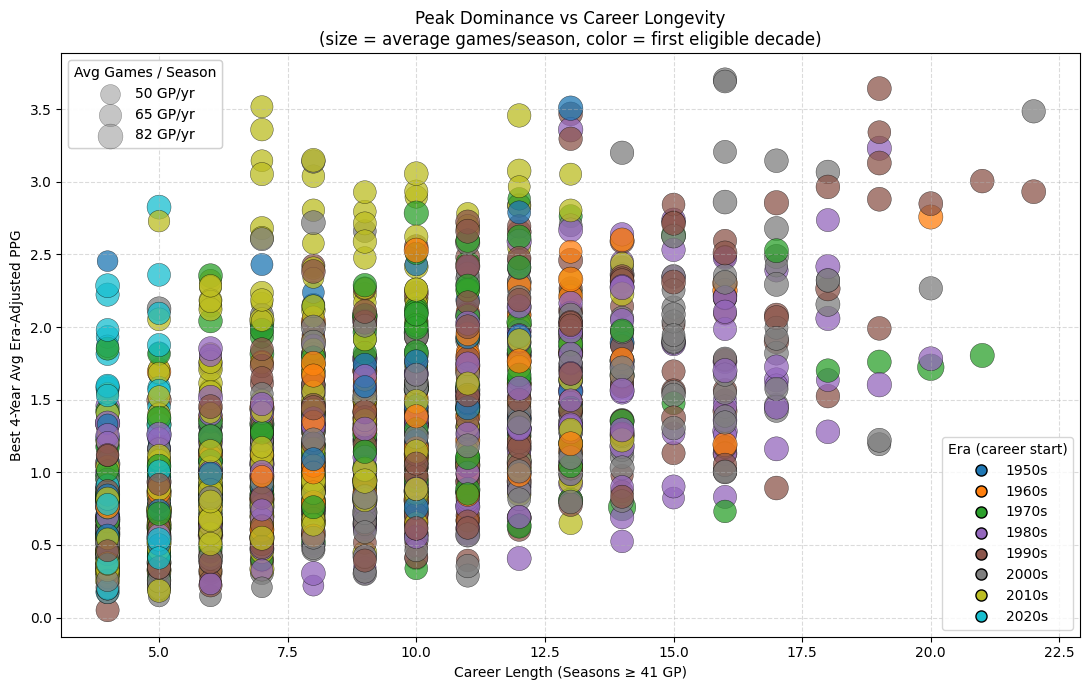

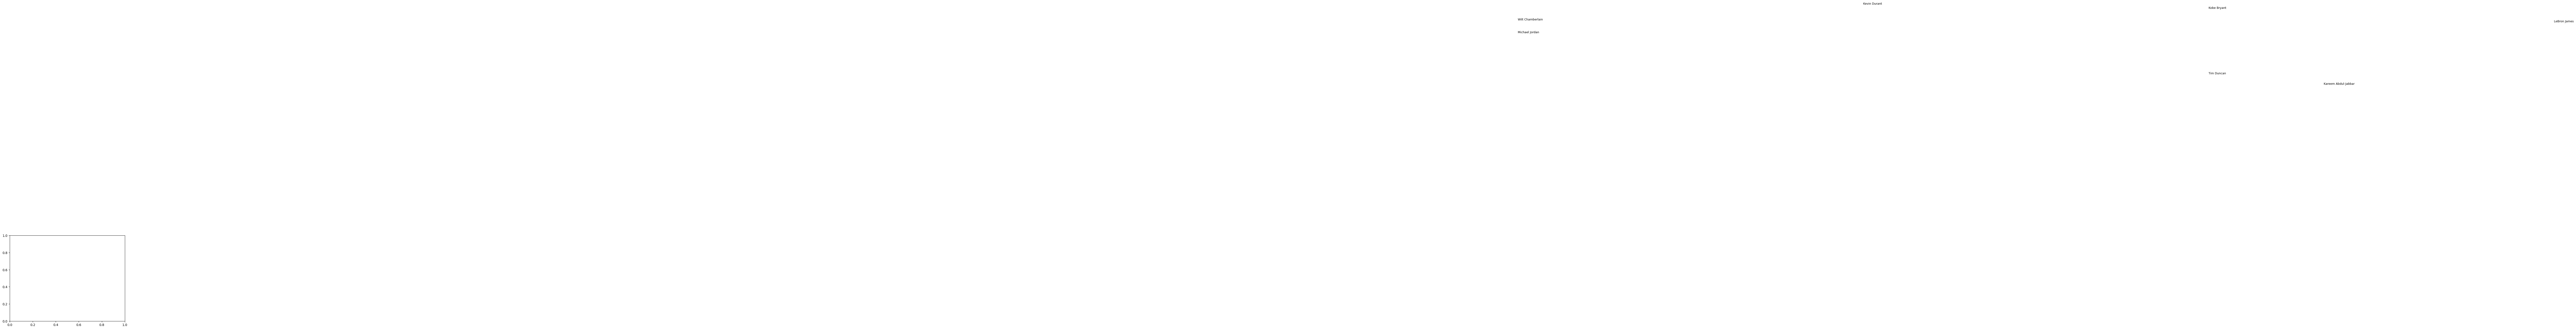

In [45]:
from matplotlib.lines import Line2D

# 1) Player’s first eligible season start year (to define "era")
first_years = (
    ps_all[ps_all["gamesPlayed"] >= MIN_GAMES]
      .assign(start_year=lambda d: d["season"].str.slice(0, 4).astype(int))
      .groupby(["firstName", "lastName"], as_index=False)["start_year"]
      .min()
      .rename(columns={"start_year": "firstYear"})
)

# 2) Merge all pieces into one scatter dataset
scatter_df = (
    peak_4yr
    .merge(career_length, on=["firstName", "lastName"], how="inner")
    .merge(avg_gp, on=["firstName", "lastName"], how="left")
    .merge(first_years, on=["firstName", "lastName"], how="left")
)

# Drop rows missing needed fields
scatter_df = scatter_df.dropna(subset=["best4yrEraAdjPPG", "careerSeasons", "avgGamesPerSeason", "firstYear"]).copy()

# 3) Era labels (decades) and visual encodings
scatter_df["eraDecade"] = (scatter_df["firstYear"] // 10) * 10
scatter_df["eraLabel"]  = scatter_df["eraDecade"].astype(int).astype(str) + "s"

# Point size (durability): scale avg GP into a reasonable dot size
scatter_df["pt_size"] = (scatter_df["avgGamesPerSeason"] / 82.0) * 300.0 + 20.0

# Encode era to numeric codes for colormap
era_order = sorted(scatter_df["eraLabel"].unique())
era_to_code = {era: i for i, era in enumerate(era_order)}
scatter_df["eraCode"] = scatter_df["eraLabel"].map(era_to_code)

# 4) Plot
plt.figure(figsize=(11, 7))
sc = plt.scatter(
    scatter_df["careerSeasons"],
    scatter_df["best4yrEraAdjPPG"],
    c=scatter_df["eraCode"],
    s=scatter_df["pt_size"],
    alpha=0.75,
    cmap="tab10",  # auto distinct colors per era
    edgecolor="k",
    linewidth=0.3,
)

plt.xlabel(f"Career Length (Seasons ≥ {MIN_GAMES} GP)")
plt.ylabel("Best 4-Year Avg Era-Adjusted PPG")
plt.title("Peak Dominance vs Career Longevity\n(size = average games/season, color = first eligible decade)")
plt.grid(True, linestyle="--", alpha=0.45)

# Legend for eras (colors)
era_handles = [
    Line2D([0], [0], marker="o", linestyle="", markersize=8,
           markerfacecolor=plt.cm.tab10(era_to_code[e] / max(1, len(era_order)-1)),
           markeredgecolor="k", label=e)
    for e in era_order
]
legend1 = plt.legend(handles=era_handles, title="Era (career start)", loc="lower right")
plt.gca().add_artist(legend1)

# Legend for sizes (durability): show a few reference bubbles
for sz in [50, 65, 82]:
    plt.scatter([], [], s=(sz/82.0)*300.0+20.0, c="gray", alpha=0.4, edgecolor="k", linewidth=0.3, label=f"{sz} GP/yr")
legend2 = plt.legend(title="Avg Games / Season", loc="upper left")
plt.gca().add_artist(legend2)

plt.tight_layout()
plt.show()

highlight = {
    "LeBron James", "Michael Jordan", "Kareem Abdul-Jabbar",
    "Kobe Bryant", "Wilt Chamberlain", "Kevin Durant", "Tim Duncan"
}
for _, r in scatter_df.iterrows():
    name = f"{r['firstName']} {r['lastName']}"
    if name in highlight:
        plt.text(r["careerSeasons"] + 0.1, r["best4yrEraAdjPPG"], name, fontsize=9)

plt.show()

## Sensitivity Check (Robust Findings) ##

In [48]:
def compute_rank(player_season: pd.DataFrame,
                 league_scoring: pd.DataFrame,
                 min_games: int = 41,
                 window: int = 4) -> pd.DataFrame:
    """
    Returns a DataFrame with columns:
      firstName, lastName, Player, careerSeasons, avgGamesPerSeason,
      bestRolling (best {window}-yr era-adjusted PPG), Balance,
      min_games, window
    """
    # 1) Collapse across teams within a season
    ps_all = (
        player_season.groupby(["firstName", "lastName", "season"], as_index=False)
        .agg(
            gamesPlayed=("gamesPlayed", "sum"),
            totalPoints=("totalPoints", "sum"),
            totalAssists=("totalAssists", "sum"),
            totalRebounds=("totalRebounds", "sum"),
            totalMinutes=("totalMinutes", "sum"),
        )
    )
    ps_all["ppg"] = ps_all["totalPoints"] / ps_all["gamesPlayed"]

    # 2) Era-adjusted
    ps_all = ps_all.merge(
        league_scoring[["season", "leaguePPG_weighted"]],
        on="season", how="left"
    )
    ps_all["eraAdjustedPPG"] = ps_all["ppg"] / ps_all["leaguePPG_weighted"]

    # 3) Chronological sort
    ps_all["start_year"] = ps_all["season"].str.slice(0, 4).astype(int)
    ps_all = ps_all.sort_values(["firstName", "lastName", "start_year"])

    # 4) Eligibility filter
    elig = ps_all[ps_all["gamesPlayed"] >= min_games].copy()

    # 5) Rolling peak (best {window}-year mean of eraAdj PPG)
    roll_col = f"best{window}yrEraAdjPPG"
    elig["roll"] = (
        elig.groupby(["firstName", "lastName"])["eraAdjustedPPG"]
            .transform(lambda s: s.rolling(window=window, min_periods=window).mean())
    )
    peak = (
        elig.groupby(["firstName", "lastName"], as_index=False)["roll"]
            .max()
            .rename(columns={"roll": roll_col})
    )

    # 6) Longevity & durability
    career_len = (
        elig.groupby(["firstName", "lastName"], as_index=False)["season"]
            .nunique()
            .rename(columns={"season": "careerSeasons"})
    )
    avg_gp = (
        elig.groupby(["firstName", "lastName"], as_index=False)["gamesPlayed"]
            .mean()
            .rename(columns={"gamesPlayed": "avgGamesPerSeason"})
    )

    # 7) Combine & Balance score
    df = (
        peak.merge(career_len, on=["firstName", "lastName"], how="inner")
            .merge(avg_gp, on=["firstName", "lastName"], how="left")
    )
    df["Player"] = df["firstName"] + " " + df["lastName"]
    df = df.dropna(subset=[roll_col, "avgGamesPerSeason"])

    df["Balance"] = (
        df[roll_col] *
        np.log1p(df["careerSeasons"]) *
        (df["avgGamesPerSeason"] / 82.0)
    )

    df["bestRolling"] = df[roll_col]
    df["min_games"] = min_games
    df["window"] = window

    return df[["firstName","lastName","Player","careerSeasons","avgGamesPerSeason",
               "bestRolling","Balance","min_games","window"]].copy()


# ---- Run baseline and variations ----
min_games_list = [30, 41, 50, 60]
window_list    = [3, 4, 5]

# Baseline
BASE_MIN_G = 41
BASE_WIN   = 4
base_df = compute_rank(player_season, league_scoring, BASE_MIN_G, BASE_WIN)
base_top = (base_df.sort_values("Balance", ascending=False).head(25)
            .assign(rank=lambda d: np.arange(1, len(d)+1)))

results = []
comparisons = []

for mg in min_games_list:
    for w in window_list:
        df = compute_rank(player_season, league_scoring, mg, w)
        top = (df.sort_values("Balance", ascending=False).head(25)
               .assign(rank=lambda d: np.arange(1, len(d)+1)))

        # Jaccard overlap of Top-25 membership vs baseline
        set_base = set(base_top["Player"])
        set_this = set(top["Player"])
        inter = set_base & set_this
        union = set_base | set_this
        jaccard = (len(inter) / len(union)) if union else np.nan

        # Spearman on common players' ranks
        common = list(inter)
        if common:
            r_base = base_top.set_index("Player").loc[common, "rank"]
            r_this = top.set_index("Player").loc[common, "rank"]
            # align just in case
            r_this = r_this.loc[r_base.index]
            spearman = r_base.corr(r_this, method="spearman")
        else:
            spearman = np.nan

        results.append({
            "min_games": mg,
            "window": w,
            "Top25_Jaccard_vs_baseline": round(jaccard, 3),
            "Spearman_vs_baseline": round(float(spearman), 3) if pd.notna(spearman) else np.nan
        })

        # Keep the specific Top-25 for inspection (optional)
        comparisons.append({
            "min_games": mg,
            "window": w,
            "Top25": top["Player"].tolist()
        })

sens_summary = pd.DataFrame(results).sort_values(["min_games","window"]).reset_index(drop=True)
print("\n=== Sensitivity summary vs baseline (min_games=41, window=4) ===")
print(sens_summary.to_string(index=False))


=== Sensitivity summary vs baseline (min_games=41, window=4) ===
 min_games  window  Top25_Jaccard_vs_baseline  Spearman_vs_baseline
        30       3                      1.000                 0.993
        30       4                      1.000                 0.997
        30       5                      0.923                 0.964
        41       3                      1.000                 0.993
        41       4                      1.000                 1.000
        41       5                      0.923                 0.967
        50       3                      1.000                 0.993
        50       4                      1.000                 1.000
        50       5                      0.923                 0.963
        60       3                      0.923                 0.964
        60       4                      0.923                 0.972
        60       5                      0.923                 0.947


## Efficiency Lens (Top-25 efficiency-balance) ##

In [51]:
# --- 1) Regular season, collapse to player+season totals needed for TS% ---
regular = player_stats[player_stats["gameType"] == "Regular Season"].copy()

ps_eff = (
    regular.groupby(["firstName", "lastName", "season"], as_index=False)
    .agg(
        gamesPlayed=("gameDate", "nunique"),
        totalPoints=("points", "sum"),
        totalFGA=("fieldGoalsAttempted", "sum"),
        totalFTA=("freeThrowsAttempted", "sum"),
        totalMinutes=("numMinutes", "sum"),
    )
)

# --- 2) Player TS% = Points / (2 * (FGA + 0.44 * FTA)) ---
ps_eff["ts_denom"] = 2.0 * (ps_eff["totalFGA"] + 0.44 * ps_eff["totalFTA"])
ps_eff["TS_pct"] = np.where(ps_eff["ts_denom"] > 0, ps_eff["totalPoints"] / ps_eff["ts_denom"], np.nan)

# --- 3) League TS% per season (properly weighted via totals) ---
league_ts = (
    ps_eff.groupby("season", as_index=False)
    .agg(
        L_points=("totalPoints", "sum"),
        L_fga=("totalFGA", "sum"),
        L_fta=("totalFTA", "sum"),
    )
)
league_ts["leagueTS_pct"] = league_ts["L_points"] / (2.0 * (league_ts["L_fga"] + 0.44 * league_ts["L_fta"]))

# --- 4) Era-adjusted efficiency: TS+ = player TS% / league TS% (×100 optional) ---
eff_df = ps_eff.merge(league_ts[["season", "leagueTS_pct"]], on="season", how="left")
eff_df["TS_plus"] = eff_df["TS_pct"] / eff_df["leagueTS_pct"]          # ratio (1.00 = league avg)
# eff_df["TS_plus_idx"] = eff_df["TS_plus"] * 100                      # optional index with 100 = league avg

# --- 5) Chronology & eligibility for rolling windows ---
eff_df["start_year"] = eff_df["season"].str.slice(0, 4).astype(int)
eff_df = eff_df.sort_values(["firstName", "lastName", "start_year"])

elig_eff = eff_df[eff_df["gamesPlayed"] >= MIN_GAMES].copy()

# --- 6) Peak efficiency: best 4-year rolling TS+ (change window if you like) ---
WINDOW = 4
elig_eff["TSplus_roll"] = (
    elig_eff.groupby(["firstName", "lastName"])["TS_plus"]
            .transform(lambda s: s.rolling(window=WINDOW, min_periods=WINDOW).mean())
)

peak_eff = (
    elig_eff.groupby(["firstName", "lastName"], as_index=False)["TSplus_roll"]
            .max()
            .rename(columns={"TSplus_roll": "best4yrTSplus"})
)

# --- 7) Longevity & durability (reuse the same definitions for consistency) ---
career_len_eff = (
    elig_eff.groupby(["firstName", "lastName"], as_index=False)["season"]
            .nunique()
            .rename(columns={"season": "careerSeasons"})
)

avg_gp_eff = (
    elig_eff.groupby(["firstName", "lastName"], as_index=False)["gamesPlayed"]
            .mean()
            .rename(columns={"gamesPlayed": "avgGamesPerSeason"})
)

# --- 8) Efficiency-Balance score (analog to your PPG-based Balance) ---
eff_rank = (
    peak_eff.merge(career_len_eff, on=["firstName", "lastName"], how="inner")
            .merge(avg_gp_eff, on=["firstName", "lastName"], how="left")
)
eff_rank = eff_rank.dropna(subset=["best4yrTSplus", "avgGamesPerSeason"]).copy()

eff_rank["Player"] = eff_rank["firstName"] + " " + eff_rank["lastName"]
eff_rank["Balance_Eff"] = (
    eff_rank["best4yrTSplus"] *
    np.log1p(eff_rank["careerSeasons"]) *
    (eff_rank["avgGamesPerSeason"] / 82.0)
)

# --- 9) Top 25 by efficiency-balance ---
top25_eff = (
    eff_rank[["Player", "careerSeasons", "avgGamesPerSeason", "best4yrTSplus", "Balance_Eff"]]
    .sort_values("Balance_Eff", ascending=False)
    .head(25)
    .reset_index(drop=True)
)

# Round for display
top25_eff["avgGamesPerSeason"] = top25_eff["avgGamesPerSeason"].round(1)
top25_eff["best4yrTSplus"]     = top25_eff["best4yrTSplus"].round(3)
top25_eff["Balance_Eff"]       = top25_eff["Balance_Eff"].round(3)

print("\nTop 25 by Efficiency-Balance (TS+):")
print(top25_eff.to_string(index=False))


Top 25 by Efficiency-Balance (TS+):
             Player  careerSeasons  avgGamesPerSeason  best4yrTSplus  Balance_Eff
      Bailey Howell             12               79.2          1.542        3.820
       Walt Bellamy             13               80.2          1.392        3.591
        Jack Twyman             11               74.8          1.582        3.587
      John Stockton             19               79.2          1.202        3.476
         Greg Smith             10               79.0          1.505        3.476
      Robert Parish             21               77.6          1.156        3.381
       Johnny Green             14               75.8          1.339        3.350
Kareem Abdul-Jabbar             20               78.0          1.157        3.349
      Reggie Miller             18               77.7          1.189        3.317
     DeAndre Jordan             17               77.0          1.222        3.315
      Eddie Johnson             20               83.8        

### League Scoring (games-weighted) ###

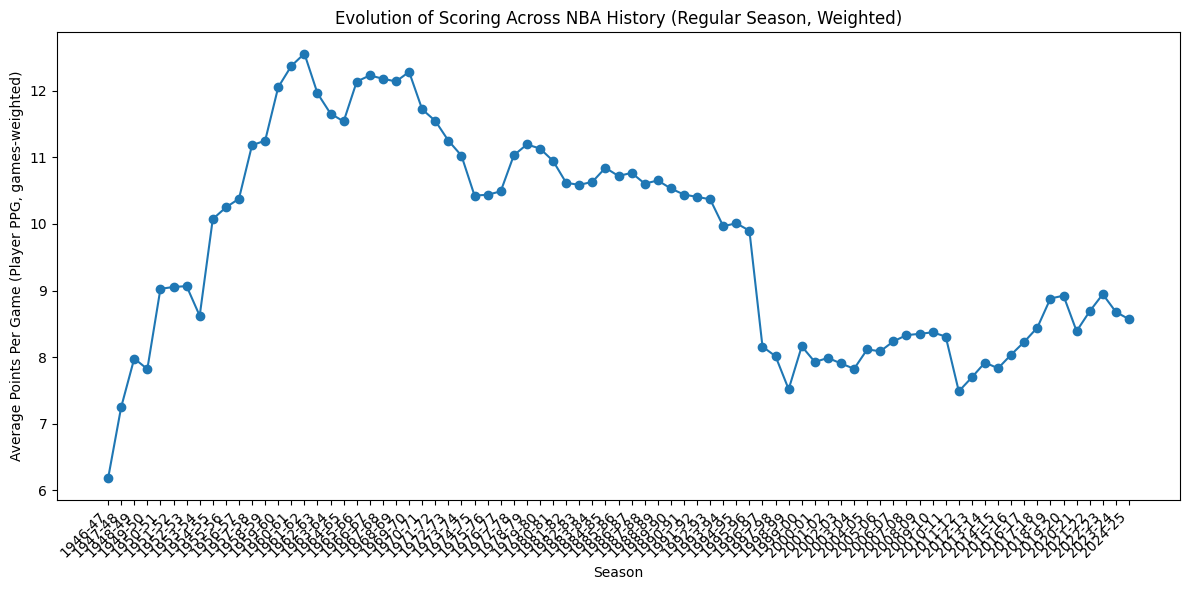

In [63]:
# === CONFIG ===
MIN_GAMES = 41
WINDOW    = 4  # best N-year rolling window (peak)

import os
os.makedirs("figs", exist_ok=True)
os.makedirs("tables", exist_ok=True)

# ---------- 0) LEAGUE SCORING (games-weighted) ----------
# Compute sum(points) / sum(games) per season (no .apply -> no deprecation)
league_scoring = (
    player_season
      .groupby("season", as_index=False)[["totalPoints", "gamesPlayed"]]
      .sum()
      .assign(leaguePPG_weighted=lambda d: d["totalPoints"] / d["gamesPlayed"])
      [["season", "leaguePPG_weighted"]]
)

# sort seasons by numeric start year for plotting
league_scoring["start_year"] = league_scoring["season"].str.slice(0, 4).astype(int)
league_scoring = league_scoring.sort_values("start_year")

# Plot & save (save FIRST, then optionally show)
plt.figure(figsize=(12, 6))
plt.plot(league_scoring["season"], league_scoring["leaguePPG_weighted"], marker="o")
plt.xlabel("Season")
plt.ylabel("Average Points Per Game (Player PPG, games-weighted)")
plt.title("Evolution of Scoring Across NBA History (Regular Season, Weighted)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
plt.savefig("figs/league_scoring_trend.png", dpi=200)
# plt.show()  # optional in scripts
plt.close()

### Player-Season Collapse (accross teams) ###

In [66]:
ps_all = (
    player_season
    .groupby(["firstName", "lastName", "season"], as_index=False)
    .agg(
        gamesPlayed=("gamesPlayed", "sum"),
        totalPoints=("totalPoints", "sum"),
        totalAssists=("totalAssists", "sum"),
        totalRebounds=("totalRebounds", "sum"),
        totalMinutes=("totalMinutes", "sum"),
    )
)
ps_all["ppg"] = ps_all["totalPoints"] / ps_all["gamesPlayed"]

# Era-adjusted PPG via weighted league average
ps_all = ps_all.merge(league_scoring[["season","leaguePPG_weighted"]], on="season", how="left")
ps_all["eraAdjustedPPG"] = ps_all["ppg"] / ps_all["leaguePPG_weighted"]
ps_all["start_year"] = ps_all["season"].str.slice(0,4).astype(int)
ps_all = ps_all.sort_values(["firstName","lastName","start_year"])

### Peak & Longevity Metrics ###

In [69]:
elig = ps_all[ps_all["gamesPlayed"] >= MIN_GAMES].copy()

# Best N-year rolling era-adjusted PPG (peak)
elig["roll"] = (
    elig.groupby(["firstName", "lastName"])["eraAdjustedPPG"]
        .transform(lambda s: s.rolling(window=WINDOW, min_periods=WINDOW).mean())
)
peak_4yr = (
    elig.groupby(["firstName","lastName"], as_index=False)["roll"]
        .max()
        .rename(columns={"roll": f"best{WINDOW}yrEraAdjPPG"})
)

# Longevity: seasons >= MIN_GAMES
career_length = (
    elig.groupby(["firstName","lastName"], as_index=False)["season"]
        .nunique()
        .rename(columns={"season":"careerSeasons"})
)

# Durability: average games per eligible season
avg_gp = (
    elig.groupby(["firstName","lastName"], as_index=False)["gamesPlayed"]
        .mean()
        .rename(columns={"gamesPlayed":"avgGamesPerSeason"})
)

### Ranked Table (Top 25) ###

In [72]:
rank_df = (
    peak_4yr.merge(career_length, on=["firstName","lastName"], how="inner")
            .merge(avg_gp,         on=["firstName","lastName"], how="left")
)
rank_df = rank_df.dropna(subset=[f"best{WINDOW}yrEraAdjPPG","avgGamesPerSeason"]).copy()
rank_df["Player"] = rank_df["firstName"] + " " + rank_df["lastName"]

# Balance = peak × ln(1+seasons) × durability
rank_df["Balance"] = (
    rank_df[f"best{WINDOW}yrEraAdjPPG"] *
    np.log1p(rank_df["careerSeasons"]) *
    (rank_df["avgGamesPerSeason"] / 82.0)
)

top25 = (
    rank_df[["Player","careerSeasons","avgGamesPerSeason",f"best{WINDOW}yrEraAdjPPG","Balance"]]
        .sort_values("Balance", ascending=False)
        .head(25)
        .reset_index(drop=True)
        .copy()
)

# Round and save
top25["avgGamesPerSeason"]            = top25["avgGamesPerSeason"].round(1)
top25[f"best{WINDOW}yrEraAdjPPG"]     = top25[f"best{WINDOW}yrEraAdjPPG"].round(3)
top25["Balance"]                      = top25["Balance"].round(3)
top25.to_csv("tables/top25_balance.csv", index=False)

### Peak vs Longevity ###

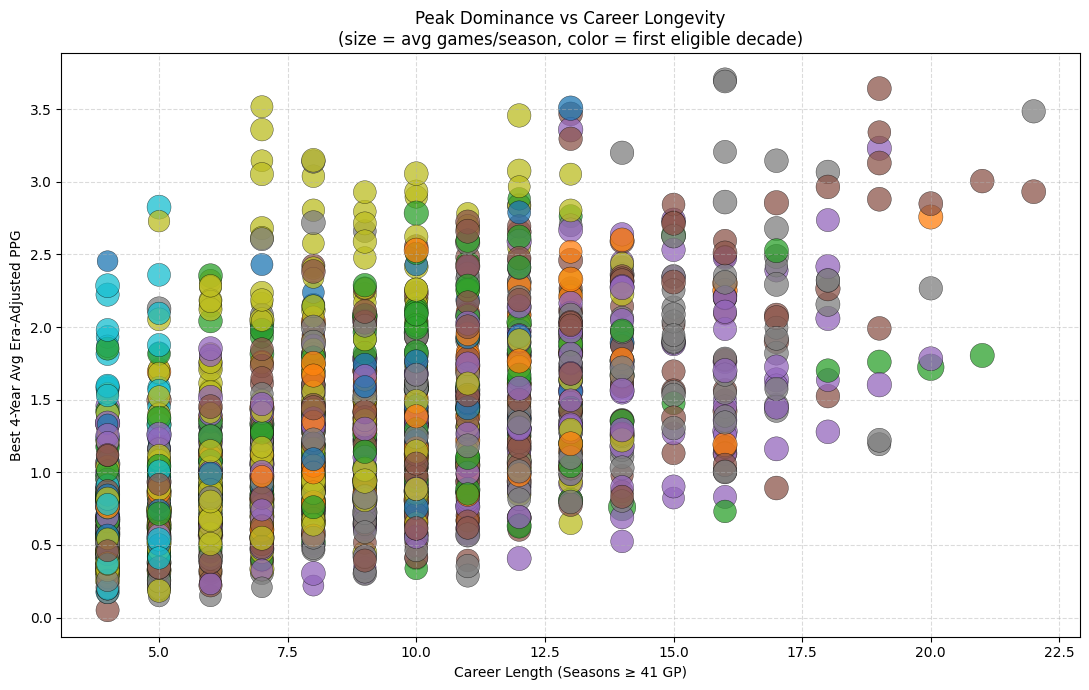

In [75]:
# Era (decade of first eligible season) for color; size by avg GP
first_years = (
    elig.groupby(["firstName","lastName"], as_index=False)["start_year"]
        .min().rename(columns={"start_year":"firstYear"})
)
scatter_df = (
    rank_df.merge(first_years, on=["firstName","lastName"], how="left")
)
scatter_df["eraDecade"] = (scatter_df["firstYear"] // 10) * 10
scatter_df["eraLabel"]  = scatter_df["eraDecade"].astype(int).astype(str) + "s"
scatter_df["pt_size"]   = (scatter_df["avgGamesPerSeason"] / 82.0) * 300.0 + 20.0

era_order  = sorted(scatter_df["eraLabel"].dropna().unique())
era_to_int = {e:i for i,e in enumerate(era_order)}
scatter_df["eraCode"] = scatter_df["eraLabel"].map(era_to_int)

plt.figure(figsize=(11,7))
sc = plt.scatter(
    scatter_df["careerSeasons"],
    scatter_df[f"best{WINDOW}yrEraAdjPPG"],
    c=scatter_df["eraCode"],
    s=scatter_df["pt_size"],
    alpha=0.75,
    cmap="tab10",
    edgecolor="k", linewidth=0.3
)
plt.xlabel(f"Career Length (Seasons ≥ {MIN_GAMES} GP)")
plt.ylabel(f"Best {WINDOW}-Year Avg Era-Adjusted PPG")
plt.title("Peak Dominance vs Career Longevity\n(size = avg games/season, color = first eligible decade)")
plt.grid(True, linestyle="--", alpha=0.45)
plt.tight_layout()
plt.show()
plt.savefig("figs/peak_vs_longevity.png", dpi=200)
plt.close()

### Lebron vs MJ era Adjusted Line ###

In [78]:
# Build era_df from ps_all to be safe
era_df = ps_all[["firstName", "lastName", "season", "eraAdjustedPPG"]].copy()

players_of_interest = era_df[
    ((era_df["firstName"]=="LeBron") & (era_df["lastName"]=="James")) |
    ((era_df["firstName"]=="Michael") & (era_df["lastName"]=="Jordan"))
].copy()
players_of_interest["player"] = players_of_interest["firstName"] + " " + players_of_interest["lastName"]
players_of_interest["start_year"] = players_of_interest["season"].str.slice(0,4).astype(int)

season_order = (
    players_of_interest[["season","start_year"]]
      .drop_duplicates()
      .sort_values("start_year")["season"]
      .tolist()
)

plot_df = (
    players_of_interest
      .pivot(index="season", columns="player", values="eraAdjustedPPG")
      .reindex(season_order)
)

plt.figure(figsize=(12,6))
for col in plot_df.columns:
    plt.plot(plot_df.index, plot_df[col], marker="o", label=col)
plt.xlabel("Season"); plt.ylabel("Era-Adjusted PPG (player ÷ league)")
plt.title("Era-Adjusted Scoring on a Shared Timeline: LeBron vs. Jordan")
plt.xticks(rotation=45, ha="right")
plt.legend(); plt.tight_layout()
plt.savefig("figs/lebron_mj_era_adjusted.png", dpi=200)
plt.close()

print("Saved:")
print("- figs/league_scoring_trend.png")
print("- figs/peak_vs_longevity.png")
print("- figs/lebron_mj_era_adjusted.png")
print("- tables/top25_balance.csv")

Saved:
- figs/league_scoring_trend.png
- figs/peak_vs_longevity.png
- figs/lebron_mj_era_adjusted.png
- tables/top25_balance.csv
